# TensorFlow 

# import the relevant libararies

In [39]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate the random dataset

In [40]:
observations = 1000;
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 +noise

np.savez('TF_intro', inputs=generated_inputs,targets=generated_targets)

In [41]:
input_size = 2
output_size = 1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Declare the input and target variables

In [42]:
inputs = tf.placeholder(tf.float32,[None, input_size])
targets = tf.placeholder(tf.float32,[None, output_size])

# Generate the weights and biases values

In [43]:
weights = tf.Variable(tf.random_uniform([input_size,output_size], minval = -0.1, maxval=0.1))
biases = tf.Variable(tf.random_uniform([output_size], minval = -0.1, maxval=0.1))


# Outlining the Model

In [44]:
outputs = tf.matmul(inputs,weights)+biases

# Chossing the objective function and the optimization method

In [45]:
mean_loss = tf.losses.mean_squared_error(labels=targets,predictions=outputs)/2

optimize = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(mean_loss)



# Prepare for execution

In [46]:
sess = tf.InteractiveSession()

# Initialize Variables

In [47]:
initializer = tf.global_variables_initializer()
sess.run(initializer)

# Loading Training data

In [48]:
training_data = np.load('TF_intro.npz')

In [49]:
training_data

# Learning

In [50]:
for e in range(100):
    _, curr_loss = sess.run([optimize, mean_loss],
                            feed_dict={inputs:training_data['inputs'], targets:training_data['targets']})
    print(curr_loss)

244.03528
171.247
123.67995
90.68055
67.11702
50.05646
37.612446
28.490849
21.775934
16.810692
13.12077
10.362652
8.287109
6.7131014
5.5089283
4.5786543
3.8522656
3.2785604
2.819996
2.448962
2.1450725
1.8932102
1.6821023
1.5032935
1.3503904
1.2185222
1.1039417
1.003737
0.9156182
0.8377663
0.7687158
0.70727307
0.6524535
0.6034363
0.55952895
0.52014077
0.48476523
0.45296374
0.42435205
0.3985948
0.3753957
0.35449177
0.33565027
0.31866294
0.30334428
0.28952816
0.27706525
0.26582202
0.255678
0.2465256
0.23826693
0.23081447
0.2240892
0.21802026
0.21254338
0.20760037
0.2031397
0.19911395
0.19548054
0.19220139
0.189242
0.18657102
0.18416044
0.18198475
0.18002123
0.17824915
0.17664966
0.17520614
0.17390327
0.17272736
0.17166607
0.1707083
0.1698438
0.1690636
0.16835937
0.16772385
0.16715033
0.16663252
0.16616532
0.16574363
0.16536313
0.16501954
0.16470958
0.16442975
0.16417718
0.16394928
0.16374356
0.16355792
0.16339035
0.16323905
0.16310263
0.16297947
0.16286826
0.1627679
0.16267732
0.16259564


# Ploting the data

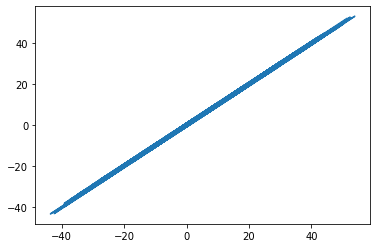

In [52]:
out = sess.run([outputs],feed_dict={inputs: training_data['inputs']})
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.show()